In [ ]:
google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import glob
len(glob.glob("/content/drive/My Drive/Spectogram/*.png"))

22

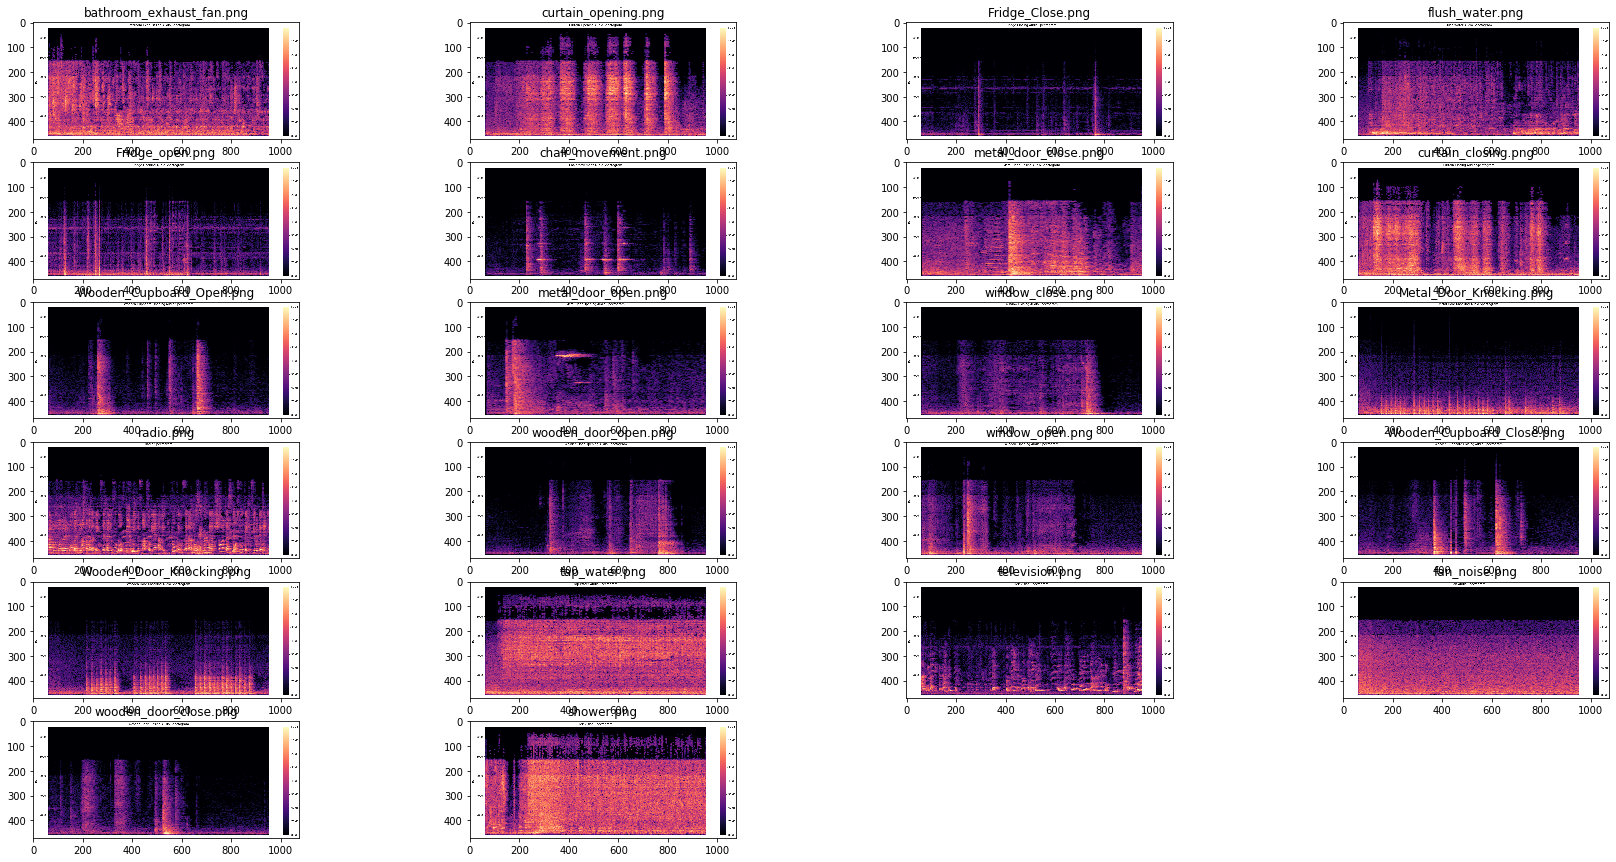

In [ ]:
import matplotlib.pyplot as plt
import cv2, os
import numpy as np

dir_images = "/content/drive/My Drive/Spectogram/"
imgs = os.listdir(dir_images)

fig = plt.figure(figsize=(30,15))
for count, imgnm in enumerate(imgs,1):
	image = plt.imread(os.path.join(dir_images, imgnm))
	ax = fig.add_subplot(6, 4, count)
	ax.imshow(image)
	ax.set_title(imgnm)
plt.show()


In [ ]:
def getLBPimage(gray_image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)

    == Output ==
    imgLBP : LBP converted image of the same shape as
    '''

    ### Step 0: Step 0: Convert an image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()
            ### Step 2: **Binary operation**:
            img01_vector = np.delete(img01_vector,4)
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

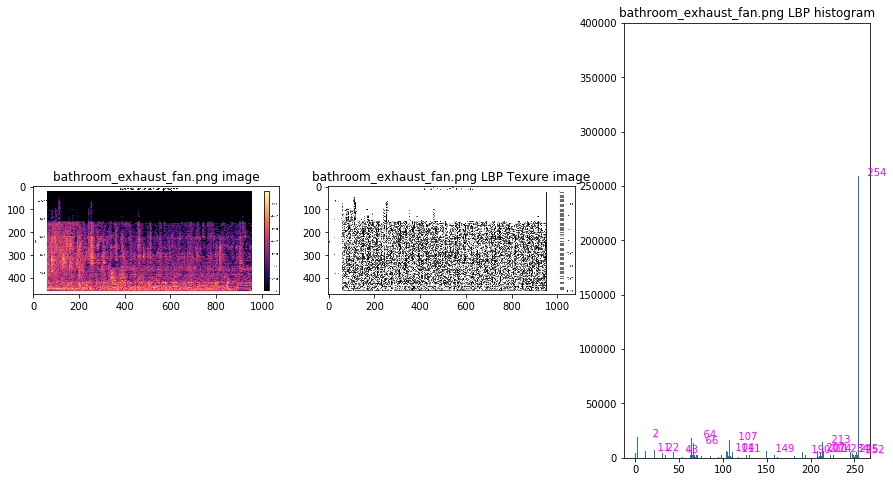

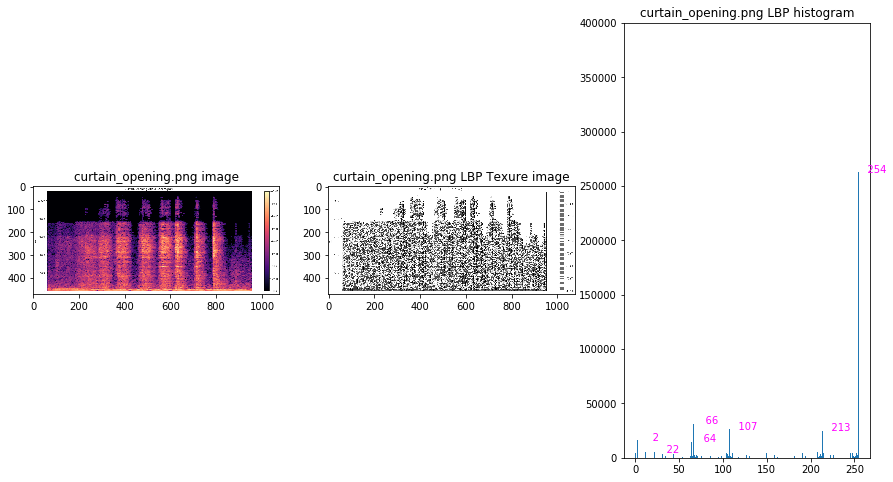

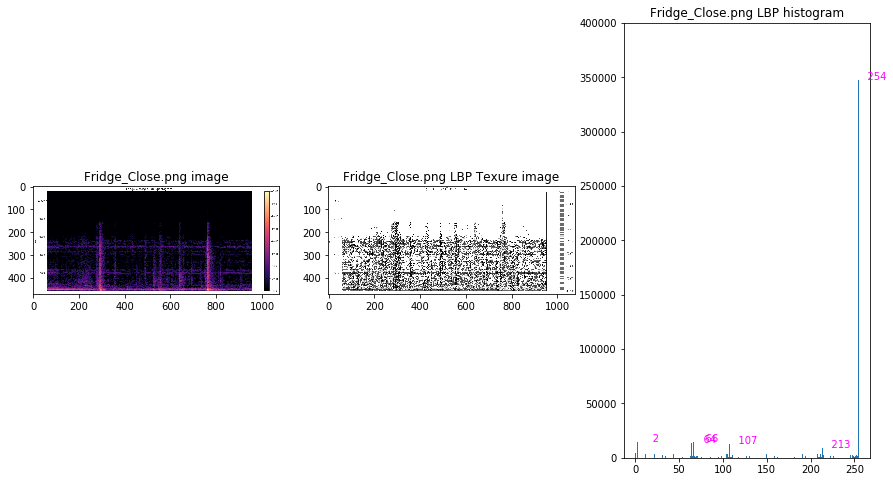

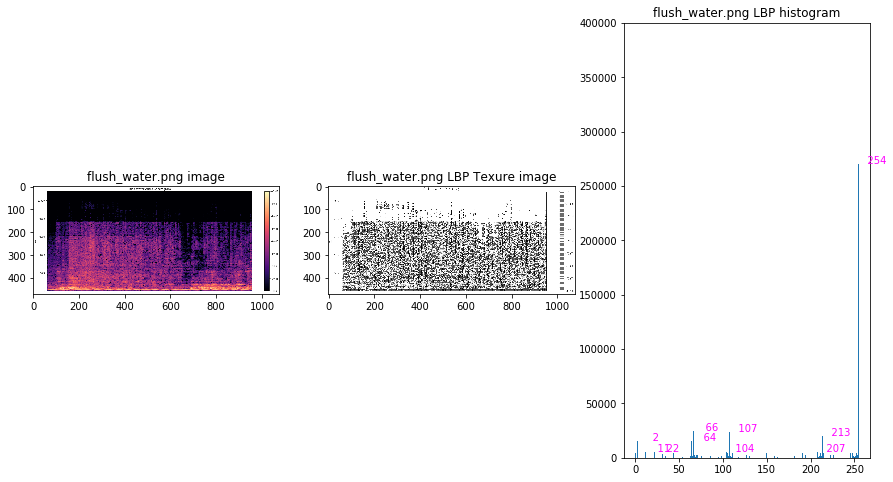

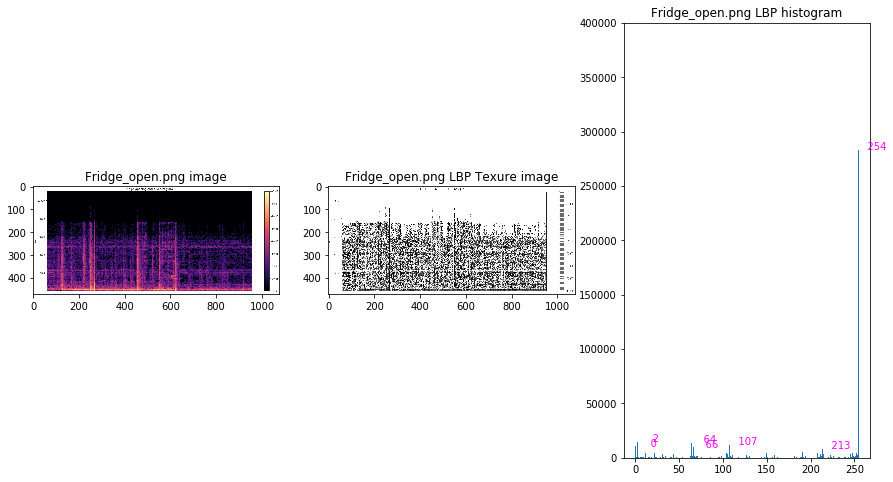

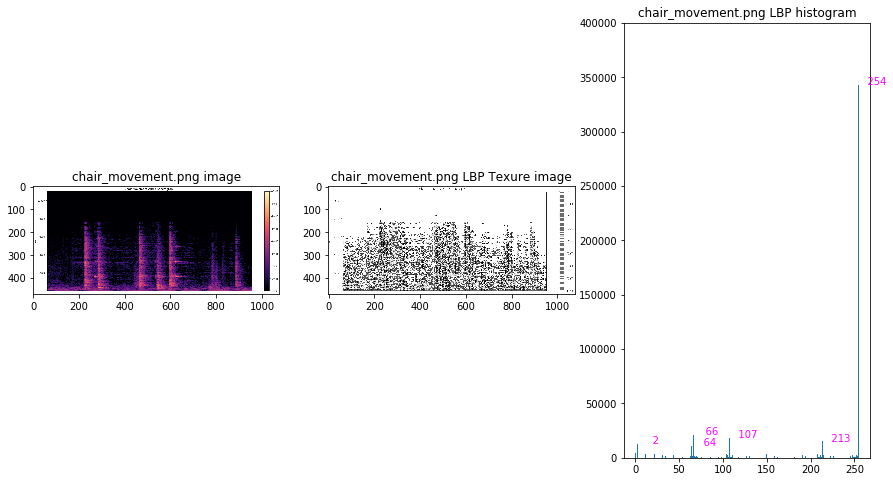

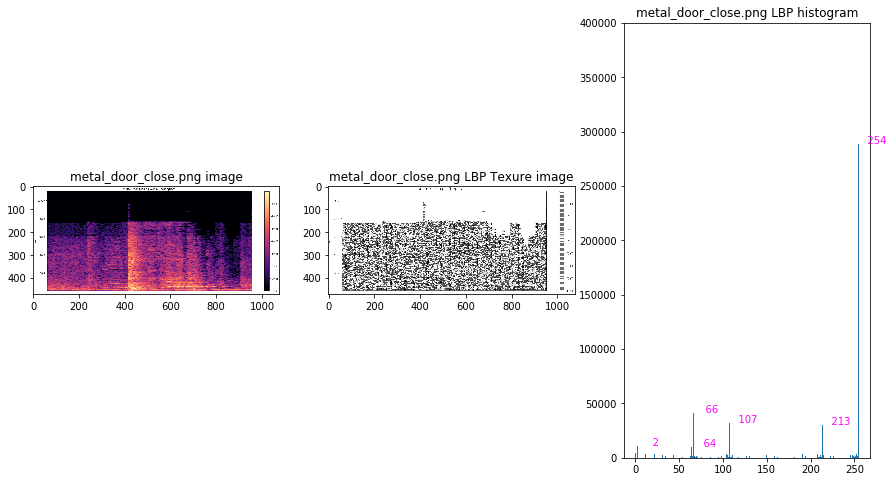

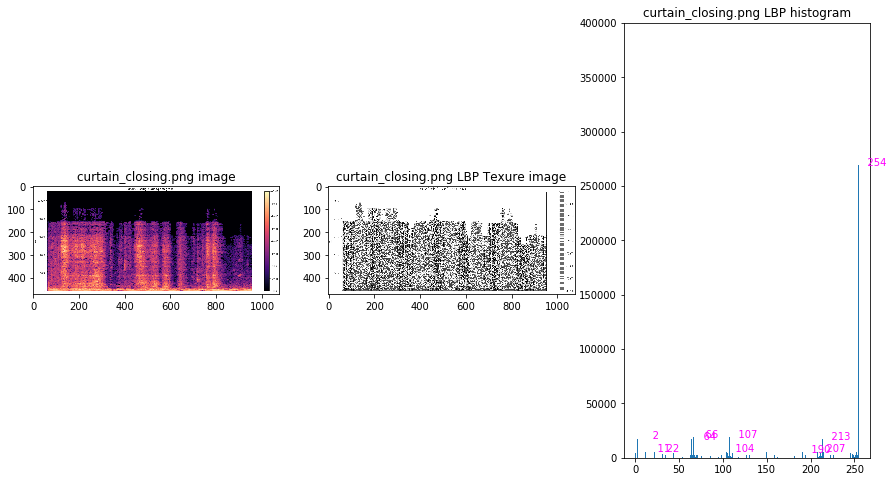

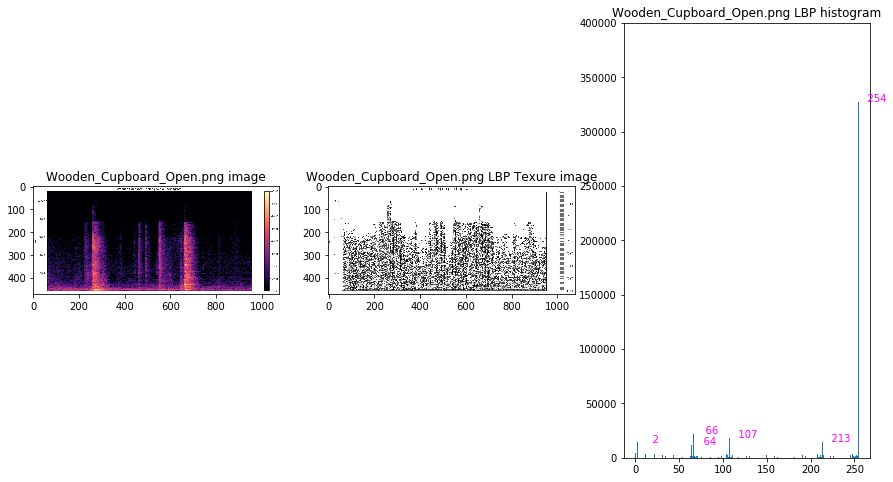

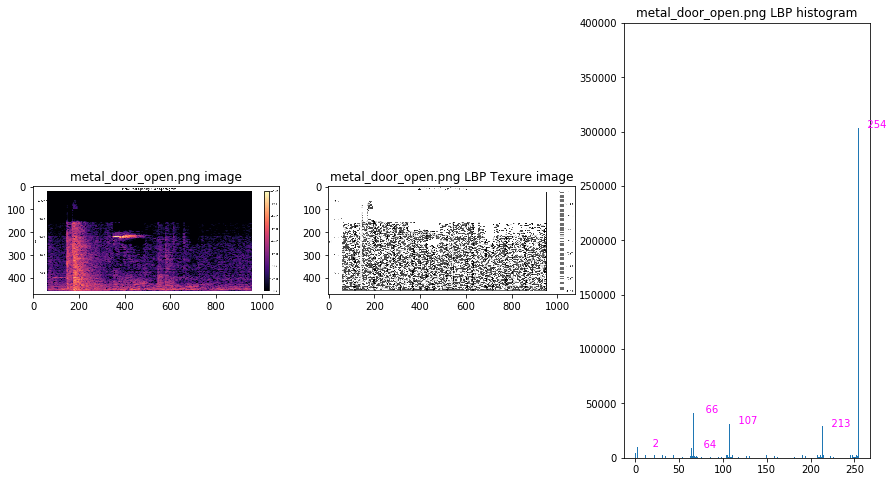

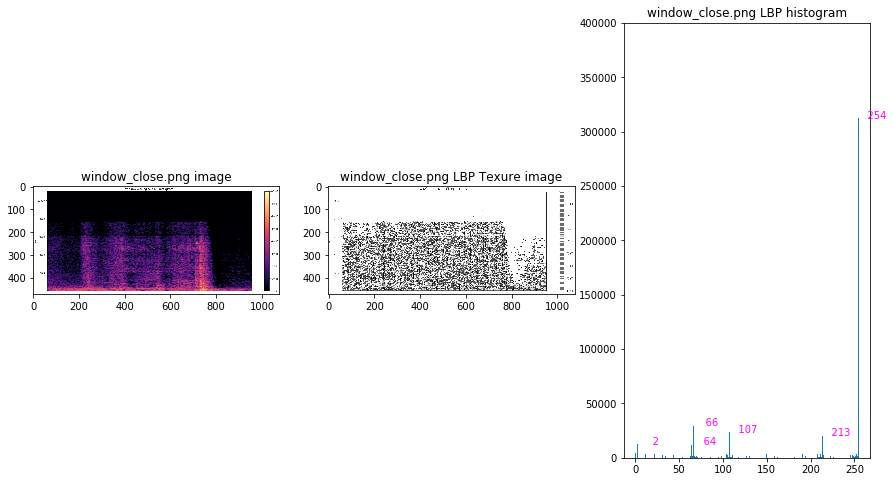

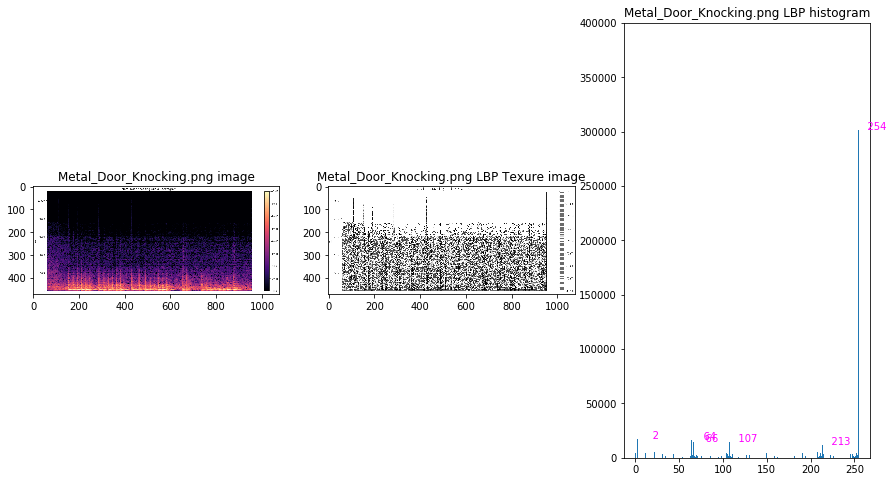

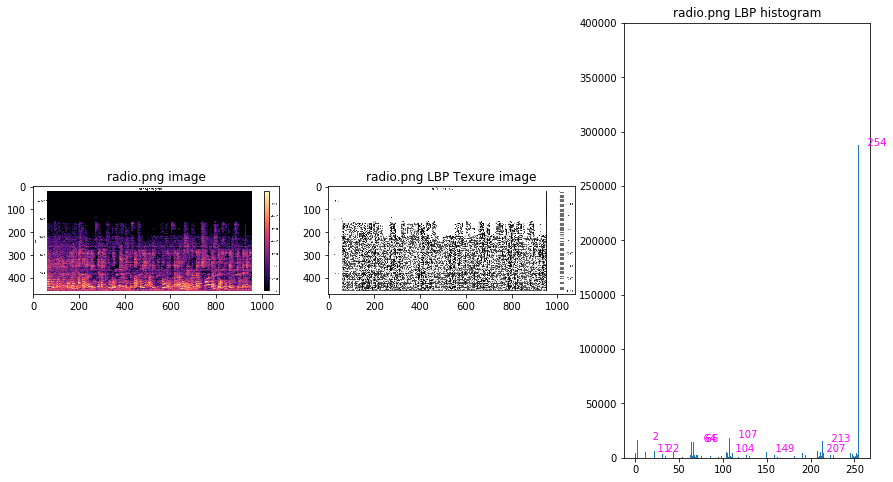

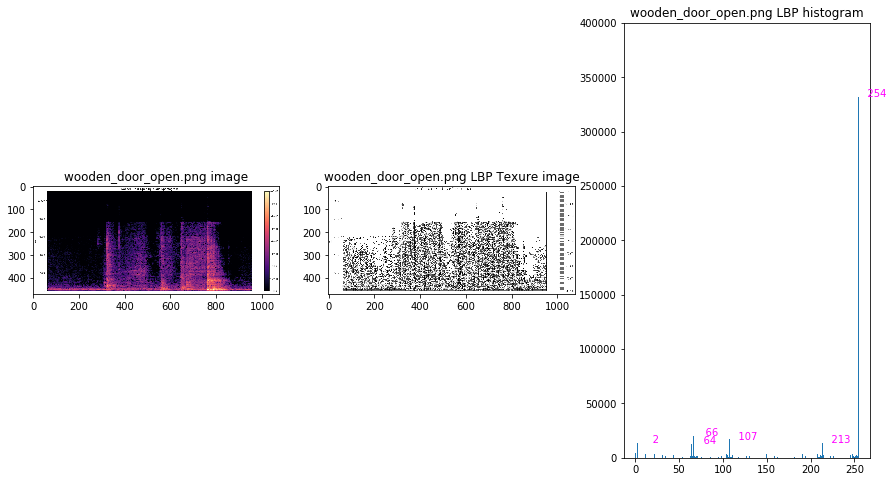

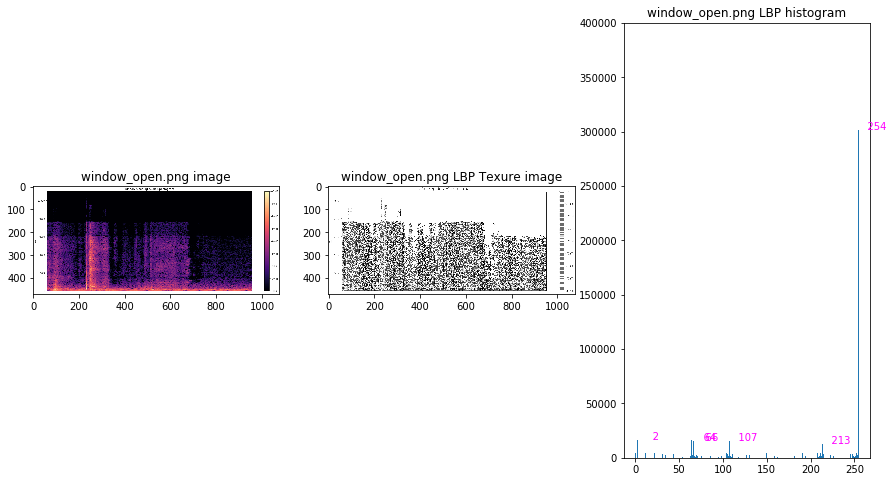

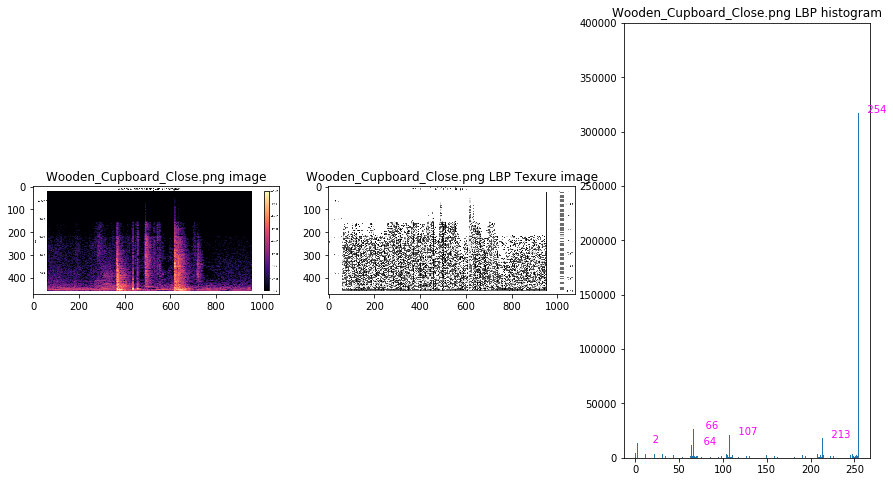

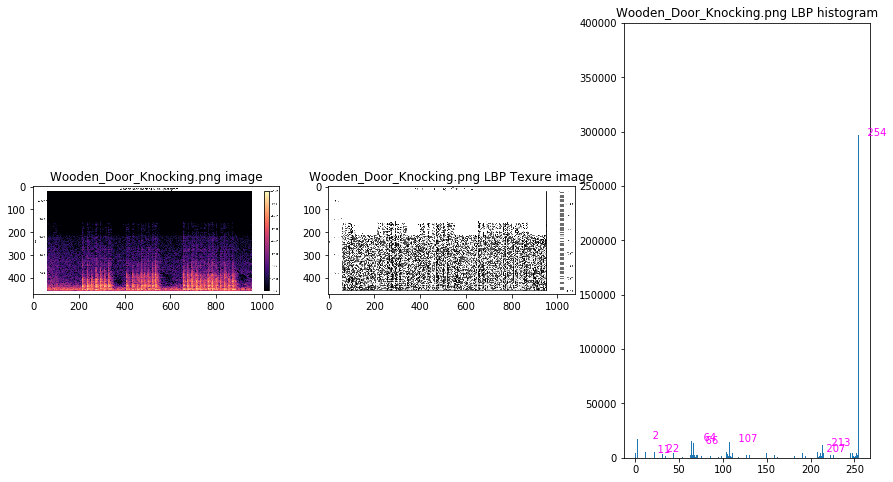

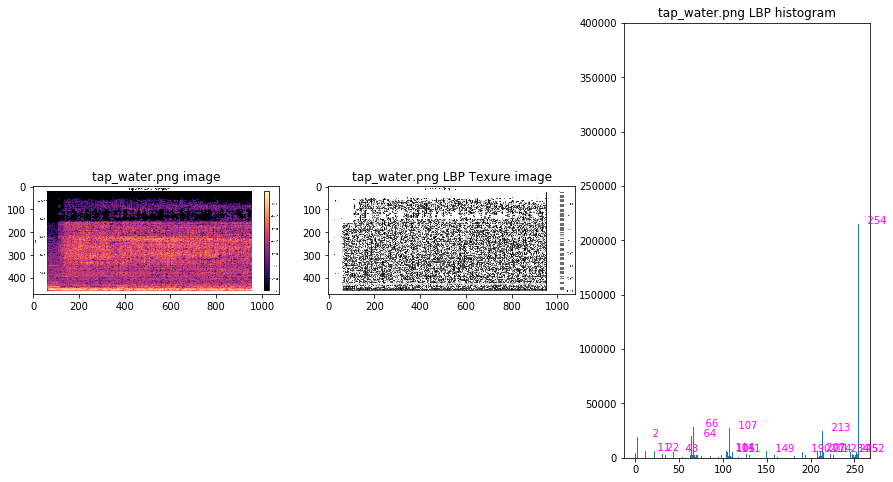

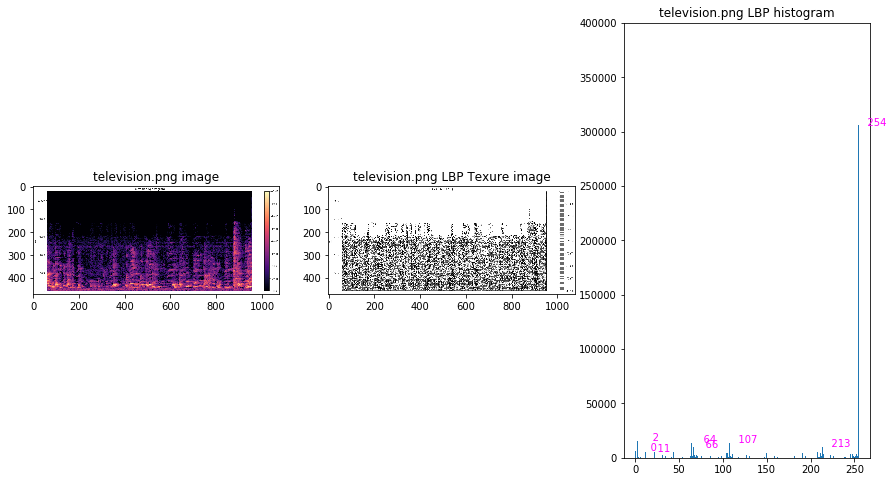

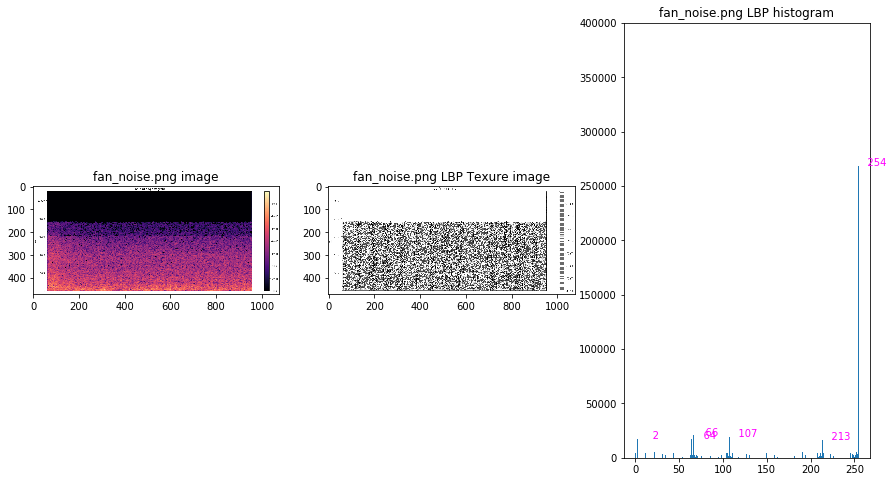

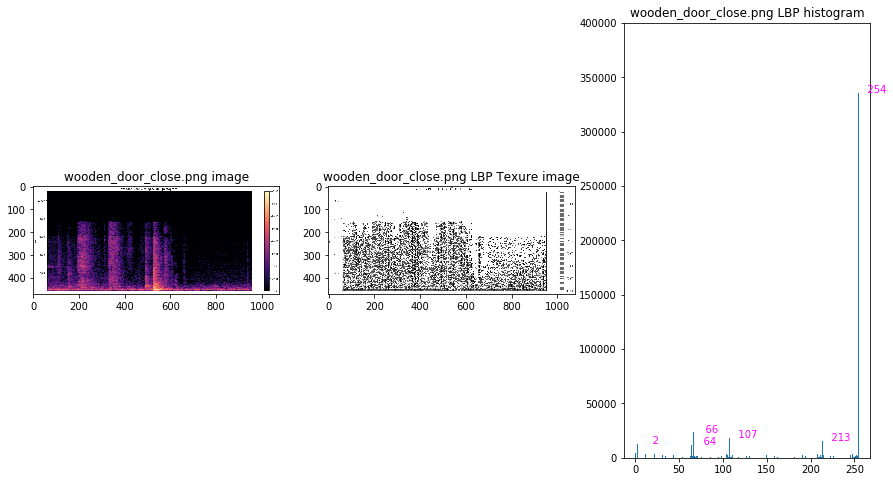

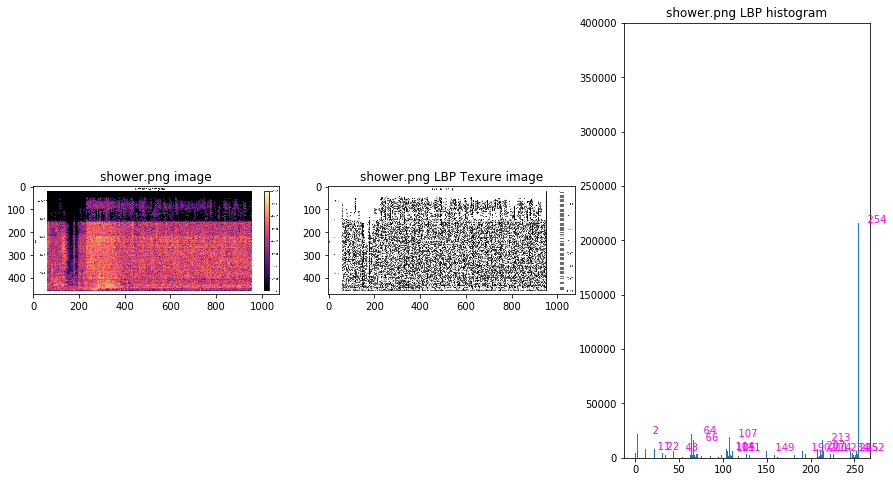

In [ ]:
dir_images = "/content/drive/My Drive/Spectogram/"
imgs = os.listdir(dir_images)

for imgnm in imgs:
    image = plt.imread(os.path.join(dir_images,imgnm))

    imgLBP    = getLBPimage(image)
    vecimgLBP = imgLBP.flatten()
    fig = plt.figure(figsize=(15,8))
    ax  = fig.add_subplot(1,3,1)
    ax.imshow(image)
    ax.set_title(f"{imgnm} image")
    ax  = fig.add_subplot(1,3,2)
    ax.imshow(imgLBP,cmap="gray")
    ax.set_title(f"{imgnm} LBP Texure image")
    ax  = fig.add_subplot(1,3,3)
    freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
    ax.set_ylim(0,400000)
    lbp = lbp[:-1]
    ## print the LBP values when frequencies are high
    largeTF = freq > 5000
    for x, fr in zip(lbp[largeTF],freq[largeTF]):
        ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
    ax.set_title(f"{imgnm} LBP histogram")
    plt.show()